# 대학

## 대학 분석
* university
> Year: 연도  
> university_Type: 학교 종류  
> Establishment_Type: 설립구분  
> Region: 지역  
> Status: 상태  
> Name: 학교명

<br>

* employed
> Year: 연도  
> Name: 학교명  
> Graduates_Male: 졸업자_남  
> Graduates_Female: 졸업자_여  
> Employed_Male: 건강보험직장가입자_남  
> Employed_Female: 건강보험직장가입자_여  
> Overseas_Employment_Male: 해외 취업자_남  
> Overseas_Employment_Female: 해외 취업자_여  
> Agriculture_Fishery_Male: 농림어업 종사자_남  
> Agriculture_Fishery_Female: 농림어업 종사자_여  
> Creative_Activities_Male: 개인창작활동종사자_남  
> Creative_Activities_Female: 개인창작활동종사자_여  
> Entrepreneurship_Male: 1인창(사)업자_남  
> Entrepreneurship_Female: 1인창(사)업자_여  
> Freelancer_Male: 프리랜서_남  
> Freelancer_Female: 프리랜서_여  
> Uncounted_Male: 취업률 미집계_남  
> Uncounted_Female: 취업률 미집계_여  
> Others_Male: 기타_남  
> Others_Female: 기타_여  
> Employment_Rate: 취업률  
> Pre_Employment_Male: 입학 당시 기취업자_남  
> Pre_Employment_Female: 입학 당시 기취업자_여  
> Campus_Employment_Male: 교내취업자_남  
> Campus_Employment_Female: 교내취업자_여
>
> ※ 취업률 계산법:  
> {(Employed + Overseas_Employment + Agriculture_Fishery + Creative_Activities + Entrepreneurship +Freelancer) / (Graduates - Uncounted)} * 100

<br>

* uncounted
> Year: 연도  
> Name: 학교명  
> Scholar_Male: 진학자_남  
> Scholar_Female: 진학자_여  
> Military_Male: 입대자_남  
> Unemployed_Male: 취업불가능자_남  
> Unemployed_Female: 취업불가능자_여  
> Foreign_Male: 외국인유학생_남  
> Foreign_Female: 외국인유학생_여  
> Excluded_Male: 제외인정자_남  
> Excluded_Female: 제외인정자_여  
>
> ※ 제외 인정자  
> 의료급여 수급권자, 여군 중 임관전 훈련생, 종교지도자 양성 학생.

### Ⅰ. 데이터 탐색

In [1]:
import pandas as pd

### ○ 대학 정보 데이터셋

In [2]:
# 대학 데이터 호출
un_df = pd.read_csv("./datasets/university.csv")
un_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1167,2022,전문대학,사립,강원,기존,한림성심대학교
1168,2022,전문대학,사립,서울,기존,한양여자대학교
1169,2022,전문대학,사립,전남,기존,한영대학교
1170,2022,전문대학,사립,충남,기존,혜전대학교


In [3]:
# un_df의 정보 가져오기
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                1172 non-null   int64 
 1   University_Type     1172 non-null   object
 2   Establishment_Type  1172 non-null   object
 3   Region              1172 non-null   object
 4   Status              1172 non-null   object
 5   Name                1172 non-null   object
dtypes: int64(1), object(5)
memory usage: 55.1+ KB


#### 📊 각 피처의 데이터 별 개수 확인

In [4]:
un_df['Year'].value_counts()

Year
2020    392
2022    391
2021    389
Name: count, dtype: int64

In [5]:
un_df['University_Type'].value_counts()

University_Type
대학교         636
전문대학        408
기능대학         85
교육대학         30
산업대학          7
각종학교(대학)      6
Name: count, dtype: int64

In [6]:
un_df['Establishment_Type'].value_counts()

Establishment_Type
사립       998
국립       123
공립        24
특별법법인     12
특별법국립      9
국립대법인      6
Name: count, dtype: int64

In [7]:
un_df['Region'].value_counts()

Region
경기    212
서울    165
경북    105
충남     78
강원     72
부산     71
경남     69
전남     66
전북     62
충북     57
광주     54
대전     52
대구     39
인천     28
울산     15
제주     15
세종     12
Name: count, dtype: int64

In [8]:
un_df['Status'].value_counts()

Status
기존    1150
폐교      22
Name: count, dtype: int64

In [9]:
un_df['Name'].value_counts()

Name
가야대학교(김해)             3
계명문화대학교               3
대전보건대학교               3
대전과학기술대학교             3
대원대학교                 3
                     ..
우송대학교(산업대)            1
동부산대학교                1
인제대학교 _제2캠퍼스          1
한북대학교                 1
한국폴리텍 II 대학 남인천캠퍼스    1
Name: count, Length: 395, dtype: int64

#### 📊 결측치 검사

In [10]:
# un_df 결측치 개수 가져오기
un_df.isna().sum()

Year                  0
University_Type       0
Establishment_Type    0
Region                0
Status                0
Name                  0
dtype: int64

#### 📊 중복행 검사

In [11]:
# un_df의 중복행 개수를 가져오기
un_df.duplicated().sum()

0

### ○ 대학 별 취업률 데이터셋

In [12]:
em_df = pd.read_csv("./datasets/employed.csv")
em_df

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1168,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1169,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1170,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


In [13]:
# em_df의 정보 가져오기
em_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1172 non-null   int64  
 1   Name                        1172 non-null   object 
 2   Graduates_Male              1172 non-null   object 
 3   Graduates_Female            1172 non-null   object 
 4   Employed_Male               1172 non-null   object 
 5   Employed_Female             1172 non-null   object 
 6   Overseas_Employment_Male    1172 non-null   int64  
 7   Overseas_Employment_Female  1172 non-null   int64  
 8   Agriculture_Fishery_Male    1172 non-null   int64  
 9   Agriculture_Fishery_Female  1172 non-null   int64  
 10  Creative_Activities_Male    1172 non-null   int64  
 11  Creative_Activities_Female  1172 non-null   int64  
 12  Entrepreneurship_Male       1172 non-null   int64  
 13  Entrepreneurship_Female     1172 

#### 📊 각 피처의 데이터 별 개수 확인

In [14]:
em_df['Year'].value_counts()

Year
2020    392
2022    391
2021    389
Name: count, dtype: int64

In [15]:
em_df['Name'].value_counts()

Name
가야대학교(김해)             3
계명문화대학교               3
대전보건대학교               3
대전과학기술대학교             3
대원대학교                 3
                     ..
우송대학교(산업대)            1
동부산대학교                1
인제대학교 _제2캠퍼스          1
한북대학교                 1
한국폴리텍 II 대학 남인천캠퍼스    1
Name: count, Length: 395, dtype: int64

#### 📊 숫자형 데이터 개수, 평균, 표준편차, 최소값, 사분위 분포도, 최대값 확인

In [16]:
em_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1172.0,2020.999147,0.817715,2020.0,2020.0,2021.0,2022.000,2022.0
Overseas_Employment_Male,1172.0,1.284983,4.345342,0.0,0.0,0.0,1.000,91.0
Overseas_Employment_Female,1172.0,1.529010,4.336410,0.0,0.0,0.0,1.000,46.0
Agriculture_Fishery_Male,1172.0,1.032423,6.494086,0.0,0.0,0.0,0.000,116.0
Agriculture_Fishery_Female,1172.0,0.548635,2.857299,0.0,0.0,0.0,0.000,49.0
Creative_Activities_Male,1172.0,1.739761,4.393500,0.0,0.0,0.0,1.000,42.0
Creative_Activities_Female,1172.0,4.832765,12.742313,0.0,0.0,0.0,3.000,156.0
Entrepreneurship_Male,1172.0,6.476109,6.400011,0.0,1.0,5.0,10.000,55.0
Entrepreneurship_Female,1172.0,6.445392,7.032650,0.0,1.0,5.0,9.000,40.0
Freelancer_Male,1172.0,22.149317,23.622329,0.0,3.0,14.0,35.000,143.0


#### 📊 결측치 검사

In [17]:
em_df.isna().sum()

Year                          0
Name                          0
Graduates_Male                0
Graduates_Female              0
Employed_Male                 0
Employed_Female               0
Overseas_Employment_Male      0
Overseas_Employment_Female    0
Agriculture_Fishery_Male      0
Agriculture_Fishery_Female    0
Creative_Activities_Male      0
Creative_Activities_Female    0
Entrepreneurship_Male         0
Entrepreneurship_Female       0
Freelancer_Male               0
Freelancer_Female             0
Uncounted_Male                0
Uncounted_Female              0
Others_Male                   0
Others_Female                 0
Employment_Rate               0
Pre_Employment_Male           0
Pre_Employment_Female         0
Campus_Employment_Male        0
Campus_Employment_Female      0
dtype: int64

#### 📊 중복행 검사

In [18]:
em_df.duplicated().sum()

0

#### 💡 분석
- 대한민국 대학 정보 및 대학 별 취업률 현황 데이터 프리셋
- 2020학년도 부터 2022학년도까지 3개년의 데이터가 존재함.
- 결측치와 중복행이 존재하지 않음.
- 취업률에서 최솟값을 0으로 가지는 데이터가 존재함.
- 폐교 되거나 3년 치 데이터를 가지지 못하는 데이터가 존재함.

#### ❓ 가설
- 폐교된 학교의 데이터는 제거해주는 것이 옳지 않을까?
- 3년 치 데이터 분석이 목표이기 때문에 3년 치를 가지지 못하는 데이터는 제거해주는 것이 옳지 않을까?
- 취업률이 0으로 나오는 데이터가 정확한 데이터가 맞는가? 정상범위 확인을 통해 이상치를 제거해줘야 하지 않을까?
> 졸업생이 적어 취업률이 0으로 나오는 데이터도 있을 수 있지 않을까?

#### 📊 폐교된 대학교 데이터 제거

In [19]:
# 폐교된 대학교의 데이터를 제거하여 새로운 데이터 프레임에 담아주기
un_up_df = un_df[~ (un_df['Status'] == '폐교')]
un_up_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1167,2022,전문대학,사립,강원,기존,한림성심대학교
1168,2022,전문대학,사립,서울,기존,한양여자대학교
1169,2022,전문대학,사립,전남,기존,한영대학교
1170,2022,전문대학,사립,충남,기존,혜전대학교


In [20]:
# 학교명 데이터 값의 개수 계산
un_name_count = un_up_df['Name'].value_counts()

# 학교명 데이터 개수가 3보다 작은 값 추출
un_name_remove = un_name_count[un_name_count < 3].index

# 해당하는 Name 값을 가지는 행 삭제
un_up_df = un_up_df[~ un_up_df['Name'].isin(un_name_remove)].reset_index(drop=True)
un_up_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1141,2022,전문대학,사립,강원,기존,한림성심대학교
1142,2022,전문대학,사립,서울,기존,한양여자대학교
1143,2022,전문대학,사립,전남,기존,한영대학교
1144,2022,전문대학,사립,충남,기존,혜전대학교


#### 📊 3년치 취업률이 없는 데이터 제거

In [21]:
# em_df 데이터 복사하기
em_up_df = em_df.copy()

# 폐교되지 않은 학교명 추출
un_name = set(un_up_df['Name'])

# 폐교되거나 3년 치 데이터가 없는 행 삭제
em_up_df = em_up_df[em_up_df['Name'].isin(un_name)].reset_index(drop=True)
em_up_df

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


#### 📊 연도 별 대학 데이터 추출

In [22]:
em_2020_df = em_up_df[em_up_df['Year'] == 2020]
em_2021_df = em_up_df[em_up_df['Year'] == 2021]
em_2022_df = em_up_df[em_up_df['Year'] == 2022]

In [23]:
display(em_2020_df)
display(em_2021_df)
display(em_2022_df)

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2020,한림성심대학교,531,675,276,413,0,1,2,2,...,10,138,96,97,146,75.0,66,40,7,12
378,2020,한양여자대학교,0,"2,550",0,"1,062",0,9,0,0,...,152,0,331,0,864,61.1,0,116,0,57
379,2020,한영대학교,287,280,184,176,0,0,1,5,...,8,10,21,84,61,72.9,42,66,0,1
380,2020,혜전대학교,451,596,232,418,0,1,0,0,...,6,63,25,134,145,70.9,15,55,7,13


,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
382,2021,가야대학교(김해),193,353,123,248,0,0,0,0,...,5,18,12,46,85,74.6,11,23,1,9
383,2021,가천대학교,"1,925","2,253","1,103","1,227",0,0,0,0,...,91,179,186,545,697,67.4,46,45,19,35
384,2021,가톨릭관동대학교,982,691,494,333,4,6,0,0,...,33,70,69,356,245,60.8,15,17,7,5
385,2021,가톨릭꽃동네대학교,37,80,27,53,0,0,0,0,...,1,2,1,5,25,73.7,1,2,1,1
386,2021,가톨릭대학교,563,915,293,415,0,0,0,0,...,47,66,101,178,344,60.2,6,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2021,한림성심대학교,494,602,249,341,0,0,0,0,...,8,132,95,94,154,71.5,76,38,5,9
760,2021,한양여자대학교,0,"2,361",0,"1,090",0,16,0,0,...,139,0,312,0,677,67.0,0,122,0,52
761,2021,한영대학교,328,225,214,160,0,0,3,2,...,4,14,14,86,44,75.2,39,76,0,2
762,2021,혜전대학교,434,629,218,443,0,0,0,0,...,14,71,36,116,131,74.2,16,55,6,10


,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
764,2022,가야대학교(김해),209,345,125,230,0,0,0,0,...,7,16,15,63,90,70.7,15,27,1,14
765,2022,가천대학교,"2,000","2,437","1,148","1,306",9,7,2,0,...,153,186,223,528,693,69.7,40,59,23,45
766,2022,가톨릭관동대학교,"1,049",636,542,322,4,6,0,0,...,28,84,51,339,215,64.3,17,23,5,11
767,2022,가톨릭꽃동네대학교,41,82,31,61,0,0,0,0,...,2,2,2,7,17,79.8,1,1,1,1
768,2022,가톨릭대학교,665,961,351,490,0,2,0,0,...,49,103,115,181,298,66.0,13,18,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


#### 📊 대학 목록 확인

In [24]:
un_list_df = un_up_df.drop(labels='Year', axis=1)
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
1141,전문대학,사립,강원,기존,한림성심대학교
1142,전문대학,사립,서울,기존,한양여자대학교
1143,전문대학,사립,전남,기존,한영대학교
1144,전문대학,사립,충남,기존,혜전대학교


In [25]:
# 중복행 개수 확인
un_list_df.duplicated().sum()

764

In [26]:
# 중복행 삭제
un_list_df = un_list_df.drop_duplicates(keep="last").reset_index(drop=True)

In [27]:
# 대학교 목록 확인
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
377,전문대학,사립,강원,기존,한림성심대학교
378,전문대학,사립,서울,기존,한양여자대학교
379,전문대학,사립,전남,기존,한영대학교
380,전문대학,사립,충남,기존,혜전대학교


In [28]:
Employed_copy_all = em_up_df.copy()

Employed_all = Employed_copy_all[['Year', 'Name']].copy()

# 졸업 인원
Employed_copy_all['Graduates_Male'] = Employed_copy_all['Graduates_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Graduates_Female'] = Employed_copy_all['Graduates_Female'].str.replace(',', '').astype(int)

Employed_all['Graduates_total'] = Employed_copy_all['Graduates_Male'] + Employed_copy_all['Graduates_Female']

# 건강보험직장가입자
Employed_copy_all['Employed_Male'] = Employed_copy_all['Employed_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Employed_Female'] = Employed_copy_all['Employed_Female'].str.replace(',', '').astype(int)

Employed_all['Employed_total'] = Employed_copy_all['Employed_Male'] + Employed_copy_all['Employed_Female']

# 해외 취업자
Employed_copy_all['Overseas_Employment_Male'] = Employed_copy_all['Overseas_Employment_Male'].astype(int)
Employed_copy_all['Overseas_Employment_Female'] = Employed_copy_all['Overseas_Employment_Female'].astype(int)

Employed_all['Overseas_Employment_total'] = Employed_copy_all['Overseas_Employment_Male'] + Employed_copy_all['Overseas_Employment_Female']

# 농림어업 종사자
Employed_copy_all['Agriculture_Fishery_Male'] = Employed_copy_all['Agriculture_Fishery_Male'].astype(int)
Employed_copy_all['Agriculture_Fishery_Female'] = Employed_copy_all['Agriculture_Fishery_Female'].astype(int)

Employed_all['Agriculture_Fishery_total'] = Employed_copy_all['Agriculture_Fishery_Male'] + Employed_copy_all['Agriculture_Fishery_Female']

# 개인창작활동종사자
Employed_copy_all['Creative_Activities_Male'] = Employed_copy_all['Creative_Activities_Male'].astype(int)
Employed_copy_all['Creative_Activities_Female'] = Employed_copy_all['Creative_Activities_Female'].astype(int)

Employed_all['Creative_Activities_total'] = Employed_copy_all['Creative_Activities_Male'] + Employed_copy_all['Creative_Activities_Female']

# 1인창(사)업자
Employed_copy_all['Entrepreneurship_Male'] = Employed_copy_all['Entrepreneurship_Male'].astype(int)
Employed_copy_all['Entrepreneurship_Female'] = Employed_copy_all['Entrepreneurship_Female'].astype(int)

Employed_all['Entrepreneurship_total'] = Employed_copy_all['Entrepreneurship_Male'] + Employed_copy_all['Entrepreneurship_Female']

# 프리랜서
Employed_copy_all['Freelancer_Male'] = Employed_copy_all['Freelancer_Male'].astype(int)
Employed_copy_all['Freelancer_Female'] = Employed_copy_all['Freelancer_Female'].astype(int)

Employed_all['Freelancer_total'] = Employed_copy_all['Freelancer_Male'] + Employed_copy_all['Freelancer_Female']

# 취업률 미집계
Employed_copy_all['Uncounted_Male'] = Employed_copy_all['Uncounted_Male'].astype(int)
Employed_copy_all['Uncounted_Female'] = Employed_copy_all['Uncounted_Female'].astype(int)

Employed_all['Uncounted_total'] = Employed_copy_all['Uncounted_Male'] + Employed_copy_all['Uncounted_Female']

# 입학 당시 기취업자
Employed_copy_all['Pre_Employment_Male'] = Employed_copy_all['Pre_Employment_Male'].astype(int)
Employed_copy_all['Pre_Employment_Female'] = Employed_copy_all['Pre_Employment_Female'].astype(int)

Employed_all['Pre_Employment_total'] = Employed_copy_all['Pre_Employment_Male'] + Employed_copy_all['Pre_Employment_Female']

# 교내취업자
Employed_copy_all['Campus_Employment_Male'] = Employed_copy_all['Campus_Employment_Male'].astype(int)
Employed_copy_all['Campus_Employment_Female'] = Employed_copy_all['Campus_Employment_Female'].astype(int)

Employed_all['Campus_Employment_total'] = Employed_copy_all['Campus_Employment_Male'] + Employed_copy_all['Pre_Employment_Female']

# 기타
Employed_copy_all['Others_Male'] = Employed_copy_all['Others_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Others_Female'] = Employed_copy_all['Others_Female'].str.replace(',', '').astype(int)

Employed_all['Others_total'] = Employed_copy_all['Others_Male'] + Employed_copy_all['Others_Female']


Employed_all

,Year,Name,Graduates_total,Employed_total,Overseas_Employment_total,Agriculture_Fishery_total,Creative_Activities_total,Entrepreneurship_total,Freelancer_total,Uncounted_total,Pre_Employment_total,Campus_Employment_total,Others_total
0,2020,가야대학교(김해),630,423,0,0,0,4,4,26,22,20,173
1,2020,가천대학교,4322,2280,9,0,26,43,173,384,92,65,1407
2,2020,가톨릭관동대학교,1721,803,8,0,0,12,81,125,25,21,692
3,2020,가톨릭꽃동네대학교,105,72,0,0,0,1,2,7,2,4,23
4,2020,가톨릭대학교,1596,741,4,0,0,15,57,185,20,14,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,1060,632,0,0,0,8,27,182,105,54,211
1142,2022,한양여자대학교,2493,1159,42,0,55,22,224,286,156,156,705
1143,2022,한영대학교,519,361,0,3,0,7,5,10,93,38,133
1144,2022,혜전대학교,950,591,0,0,0,6,43,63,74,61,247


### ○ 대학 별 취업률 미집계 데이터셋

In [29]:
# 미집계 데이터 호출
uc_df = pd.read_csv("./datasets/uncounted.csv")
uc_df

,Year,Name,Scholar_Male,Scholar_Female,Military_Male,Unemployed_Male,Unemployed_Female,Foreign_Male,Foreign_Female,Excluded_Male,Excluded_Female
0,2020,가야대학교(김해),0,3,5,0,0,7,4,3,4
1,2020,가천대학교,114,80,17,1,0,75,85,3,9
2,2020,가톨릭관동대학교,19,16,28,0,0,16,23,9,14
3,2020,가톨릭꽃동네대학교,0,1,3,0,0,0,0,3,0
4,2020,가톨릭대학교,56,77,13,0,0,12,20,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,한림성심대학교,38,83,46,0,0,4,1,5,5
1168,2022,한양여자대학교,0,244,0,0,1,0,20,0,21
1169,2022,한영대학교,2,1,2,0,0,0,0,1,4
1170,2022,혜전대학교,15,21,16,1,0,0,1,1,8


In [30]:
# 이상치 제거
uc_df = uc_df[uc_df['Name'].isin(em_up_df['Name'])].reset_index(drop=True)
uc_df

,Year,Name,Scholar_Male,Scholar_Female,Military_Male,Unemployed_Male,Unemployed_Female,Foreign_Male,Foreign_Female,Excluded_Male,Excluded_Female
0,2020,가야대학교(김해),0,3,5,0,0,7,4,3,4
1,2020,가천대학교,114,80,17,1,0,75,85,3,9
2,2020,가톨릭관동대학교,19,16,28,0,0,16,23,9,14
3,2020,가톨릭꽃동네대학교,0,1,3,0,0,0,0,3,0
4,2020,가톨릭대학교,56,77,13,0,0,12,20,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,38,83,46,0,0,4,1,5,5
1142,2022,한양여자대학교,0,244,0,0,1,0,20,0,21
1143,2022,한영대학교,2,1,2,0,0,0,0,1,4
1144,2022,혜전대학교,15,21,16,1,0,0,1,1,8


In [31]:
uncounted_copy_all = uc_df.copy()

uncounted_all = uncounted_copy_all[['Year', 'Name']].copy()

# 진학자 인원
uncounted_copy_all['Scholar_Male'] = uncounted_copy_all['Scholar_Male'].astype(int)
uncounted_copy_all['Scholar_Female'] = uncounted_copy_all['Scholar_Female'].astype(int)

uncounted_all['Scholar_total'] = uncounted_copy_all['Scholar_Male'] + uncounted_copy_all['Scholar_Female']

# 입대자 인원
uncounted_all['Military_total'] = uncounted_copy_all['Military_Male'].astype(int)

# 취업불가능자 인원
uncounted_copy_all['Unemployed_Male'] = uncounted_copy_all['Unemployed_Male'].astype(int)
uncounted_copy_all['Unemployed_Female'] = uncounted_copy_all['Unemployed_Female'].astype(int)

uncounted_all['Unemployed_total'] = uncounted_copy_all['Unemployed_Male'] + uncounted_copy_all['Unemployed_Female']

# 외국인 유학생 인원
uncounted_copy_all['Foreign_Male'] = uncounted_copy_all['Foreign_Male'].astype(int)
uncounted_copy_all['Foreign_Female'] = uncounted_copy_all['Foreign_Female'].astype(int)

uncounted_all['Foreign_total'] = uncounted_copy_all['Foreign_Male'] + uncounted_copy_all['Foreign_Female']

# 제외인정자 인원
uncounted_copy_all['Excluded_Male'] = uncounted_copy_all['Excluded_Male'].astype(int)
uncounted_copy_all['Excluded_Female'] = uncounted_copy_all['Excluded_Female'].astype(int)

uncounted_all['Excluded_total'] = uncounted_copy_all['Excluded_Male'] + uncounted_copy_all['Excluded_Female']

uncounted_all

,Year,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,2020,가야대학교(김해),3,5,0,11,7
1,2020,가천대학교,194,17,1,160,12
2,2020,가톨릭관동대학교,35,28,0,39,23
3,2020,가톨릭꽃동네대학교,1,3,0,0,3
4,2020,가톨릭대학교,133,13,0,32,7
...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,121,46,0,5,10
1142,2022,한양여자대학교,244,0,1,20,21
1143,2022,한영대학교,3,2,0,0,5
1144,2022,혜전대학교,36,16,1,1,9


### Ⅳ. 분석

※ 사람을 제외한 모든 수량 단위는 '개'로 통일함.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [34]:
# 대학 목록
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
377,전문대학,사립,강원,기존,한림성심대학교
378,전문대학,사립,서울,기존,한양여자대학교
379,전문대학,사립,전남,기존,한영대학교
380,전문대학,사립,충남,기존,혜전대학교


In [35]:
# 각 학교 별 3개년 취업률
Employed_copy_all

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,2084,2238,1131,1149,4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,1071,650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,2493,0,1159,0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


In [36]:
# 각 대학 별 3개년 취업 정보
Employed_all

,Year,Name,Graduates_total,Employed_total,Overseas_Employment_total,Agriculture_Fishery_total,Creative_Activities_total,Entrepreneurship_total,Freelancer_total,Uncounted_total,Pre_Employment_total,Campus_Employment_total,Others_total
0,2020,가야대학교(김해),630,423,0,0,0,4,4,26,22,20,173
1,2020,가천대학교,4322,2280,9,0,26,43,173,384,92,65,1407
2,2020,가톨릭관동대학교,1721,803,8,0,0,12,81,125,25,21,692
3,2020,가톨릭꽃동네대학교,105,72,0,0,0,1,2,7,2,4,23
4,2020,가톨릭대학교,1596,741,4,0,0,15,57,185,20,14,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,1060,632,0,0,0,8,27,182,105,54,211
1142,2022,한양여자대학교,2493,1159,42,0,55,22,224,286,156,156,705
1143,2022,한영대학교,519,361,0,3,0,7,5,10,93,38,133
1144,2022,혜전대학교,950,591,0,0,0,6,43,63,74,61,247


In [37]:
# 각 대학 별 3개년 취업률 미집계 데이터
uncounted_all

,Year,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,2020,가야대학교(김해),3,5,0,11,7
1,2020,가천대학교,194,17,1,160,12
2,2020,가톨릭관동대학교,35,28,0,39,23
3,2020,가톨릭꽃동네대학교,1,3,0,0,3
4,2020,가톨릭대학교,133,13,0,32,7
...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,121,46,0,5,10
1142,2022,한양여자대학교,244,0,1,20,21
1143,2022,한영대학교,3,2,0,0,5
1144,2022,혜전대학교,36,16,1,1,9


#### 📊 전체 대학 종류

,University_Type,count
0,대학교,209
1,전문대학,131
2,기능대학,28
3,교육대학,10
4,각종학교(대학),2
5,산업대학,2


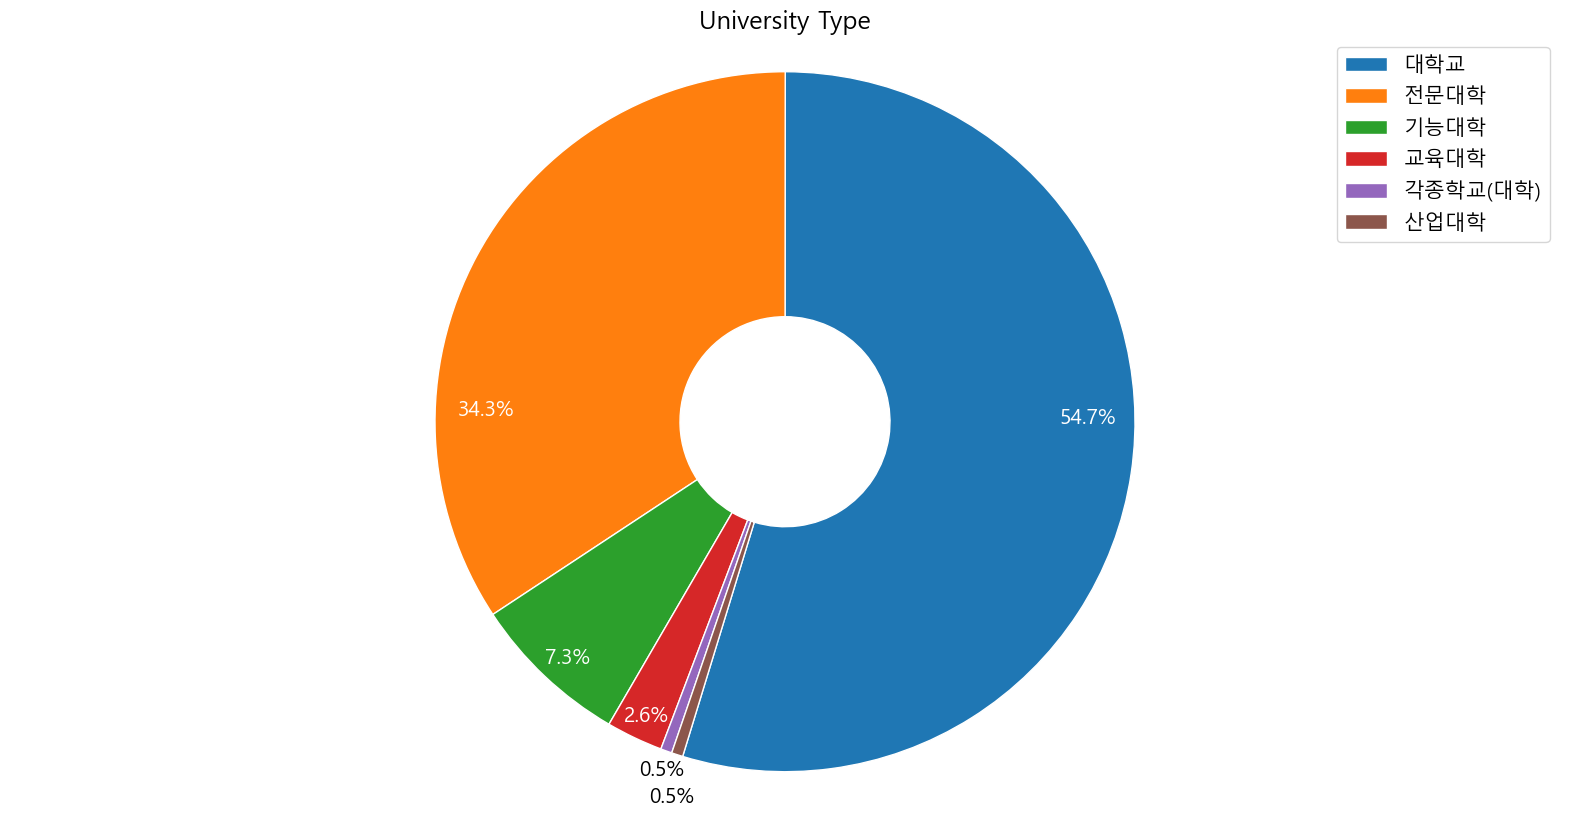

In [38]:
# 대학 종류에 대한 카운트 계산
university_type_counts = un_list_df['University_Type'].value_counts()
university_type_counts_df = university_type_counts.reset_index()
display(university_type_counts_df)

# 파이 차트 그리기
# 파이 차트 크기 설정
plt.figure(figsize=(20, 10))

# 부채꼴 스타일
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

labels = university_type_counts_df['University_Type']
sizes = university_type_counts_df['count']

plt.rcParams['font.size'] = 15

# 파이 차트 그리기, autopct: 각 항목의 비율을 소수점 첫째자리까지 표시, 첫 번째 항목이 시작되는 각도, 부채꼴 스타일
patches, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=253, wedgeprops=wedgeprops) 
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts[i].get_position()
    if i == 0:
        autotexts[i].set_position((x+0.27, y+0.1))
        autotexts[i].set_color('white')
    if i == 1:
        autotexts[i].set_position((x-0.327, y-0.25))
        autotexts[i].set_color('white')
    if i == 2:
        autotexts[i].set_position((x-0.21, y-0.24))
        autotexts[i].set_color('white')
    if i == 3:
        autotexts[i].set_position((x-0.138, y-0.3))
        autotexts[i].set_color('white')
    if i == 4:
        autotexts[i].set_position((x-0.15, y-0.43))
        autotexts[i].set_color('black')
    if i == 5:
        autotexts[i].set_position((x-0.14, y-0.5))
        autotexts[i].set_color('black')

# 원형으로 설정
plt.axis('equal')
#파이 차트 제목 설정
plt.title('University Type')
plt.legend(university_type_counts_df['University_Type'])

plt.show()

#### 💡 분석
- 대한민국 대학교 종류는 총 6개로 나뉨.
- 그 중 일반대학은 209개, 약 54.7%로 가장 높고 각종학교(대학) 및 산업대학 비율이 각 2개, 약 0.6%로 가장 낮다.

#### 📌 시사점
- 대한민국의 대학교는 일반대학과 전문대학이 전체 비율의 89%를 차지하고 있음.

#### ❓ 가설
- 일반대학과 전문대학이 높은 비중을 차지하고 있는 만큼 취업률의 비중도 일반대학과 전문대학의 비중이 높지 않을까?

#### 📊 전체 대학 설립 구분, 지역

In [39]:
establishment = un_list_df['Establishment_Type'].value_counts().reset_index()
region = un_list_df['Region'].value_counts().reset_index()

,Establishment_Type,count
0,사립,326
1,국립,39
2,공립,8
3,특별법법인,4
4,특별법국립,3
5,국립대법인,2


,Region,count
0,경기,69
1,서울,55
2,경북,34
3,충남,26
4,부산,23
5,경남,22
6,강원,22
7,전남,21
8,전북,20
9,충북,19


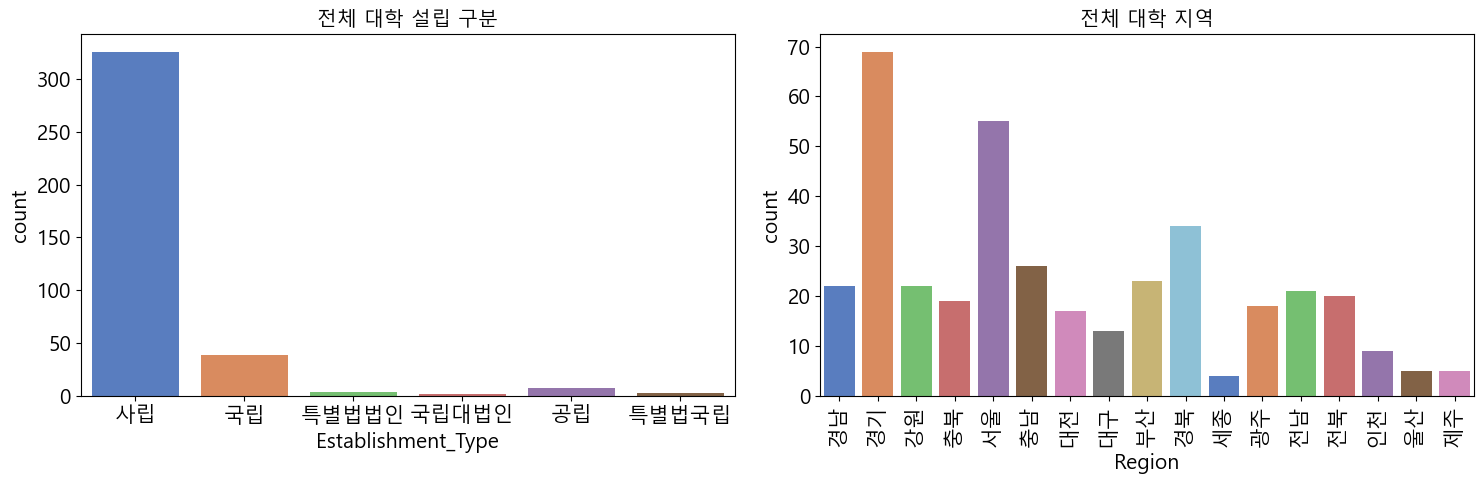

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.rcParams['font.size'] = 12

sns.countplot(ax=axes[0], x='Establishment_Type', data=un_list_df, palette='muted')
# axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('전체 대학 설립 구분')
sns.countplot(ax=axes[1], x='Region', data=un_list_df, palette='muted')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('전체 대학 지역')

display(establishment)
display(region)

plt.tight_layout()
plt.show()

#### 💡 분석
- 대한민국의 대학교 382개 중 사립 학교가 326개로 가장 많으며, 국립대법인 학교가 2개로 가장 적다.
- 위치는 경기 지역에 가장 많이 위치해있으며 69개 대학이 있고, 세종 지역에 가장 적게 위치해있으며 4개 대학이 있다. 

#### 📌 시사점
- 대부분의 대학은 사립이며, 사립대 졸업생이 취업률에 가장 높은 비중을 차지할 것이라 판단됨.
- 서울, 경기 지역이 전체 비율의 약 32%를 차지하고 있으며, 수도권 지역에 대학이 가장 많이 위치해있음을 알 수 있음.

#### 📊 전체 대학 졸업자 성비(3년)

In [41]:
# 학년도, 대학명, 남자/여자 명수 가져와서 새로운 데이터 프레임에 담기
graduates_all = Employed_copy_all[['Year', 'Name', 'Graduates_Male', 'Graduates_Female']].copy()

# 각 대학 남자/여자 명수 더하여 토탈 카운트 계산
graduates_all['Graduates_total'] = graduates_all['Graduates_Male'] + graduates_all['Graduates_Female']

# 대학 별 3년 치 남자/여자 취업생 확인 
graduates_all_total = graduates_all.groupby('Name').sum('Graduates_total').reset_index()
graduates_all_total = graduates_all_total.drop(labels='Year', axis=1)

In [42]:
# 졸업생 토탈, 학교 정보 데이터 프레임 합치기
graduates_all_total = pd.merge(graduates_all_total, un_list_df, on='Name')

# 남자 합계 구하기
male_total = graduates_all_total['Graduates_Male'].sum()
# 새로운 데이터 프레임에 담기
gender = pd.DataFrame({'Male': [male_total]})
# 여자 합계 구하고 피처 추가
gender['Female'] = graduates_all_total['Graduates_Female'].sum()

# 데이터 프레임 행과 열 변경 후 새로운 인덱스 값 넣기
gender_df = gender.T.reset_index()
# 피처명 변경
gender_df = gender_df.rename(columns={'index': 'gender', 0: 'count'})

In [43]:
# 전체 인원 중 남녀 비율 확인
gender_all = gender_df['count'].sum()

gender_df['percentage'] = round((gender_df['count'] / gender_all) * 100, 2)

#### 📊 남녀 별 취업률 평균

In [44]:
# 각 대학교 취업률 포함 데이터 모두 합산
male_Employed = Employed_copy_all['Employed_Male'] +  Employed_copy_all['Overseas_Employment_Male'] + Employed_copy_all['Agriculture_Fishery_Male'] + Employed_copy_all['Entrepreneurship_Male'] + Employed_copy_all['Freelancer_Male']
female_Employed = Employed_copy_all['Employed_Female'] +  Employed_copy_all['Overseas_Employment_Female'] + Employed_copy_all['Agriculture_Fishery_Female'] + Employed_copy_all['Entrepreneurship_Female'] + Employed_copy_all['Freelancer_Female']

# 전체 취업률 데이터 합산
male_Employed = male_Employed.sum()
female_Employed = female_Employed.sum()

# 각 성별 카운트 데이터 값 가져오기
all_male_count = gender_df[gender_df['gender'] == 'Male']['count'].values[0]
all_female_count = gender_df[gender_df['gender'] == 'Female']['count'].values[0]

# 전체 취업률 미집계 데이터 합산
all_uncounted_male = Employed_copy_all['Uncounted_Male'].sum()
all_uncounted_female = Employed_copy_all['Uncounted_Female'].sum()

# 남녀 별 취업률 구하고 소수점 2째 자리까지 보여주기
male_Employed_rate = round((male_Employed / (all_male_count - all_uncounted_male)) * 100, 2)
female_Employed_rate = round((female_Employed / (all_female_count - all_uncounted_female)) * 100, 2)

# 새로운 데이터 프레임에 남녀 취업률 데이터 담기
gender_Employed = pd.DataFrame({'male_Employed': [male_Employed_rate]})
gender_Employed['female_Employed'] = female_Employed_rate

# 데이터 프레임 행, 열 위치 변경
gender_Employed_df = gender_Employed.T.reset_index()

# 피처명 변경
gender_Employed_df = gender_Employed_df.rename(columns={'index': 'gender', 0: 'Employed'})

,gender,count,percentage
0,Male,734561,48.65
1,Female,775427,51.35


,gender,Employed
0,male_Employed,67.42
1,female_Employed,64.26


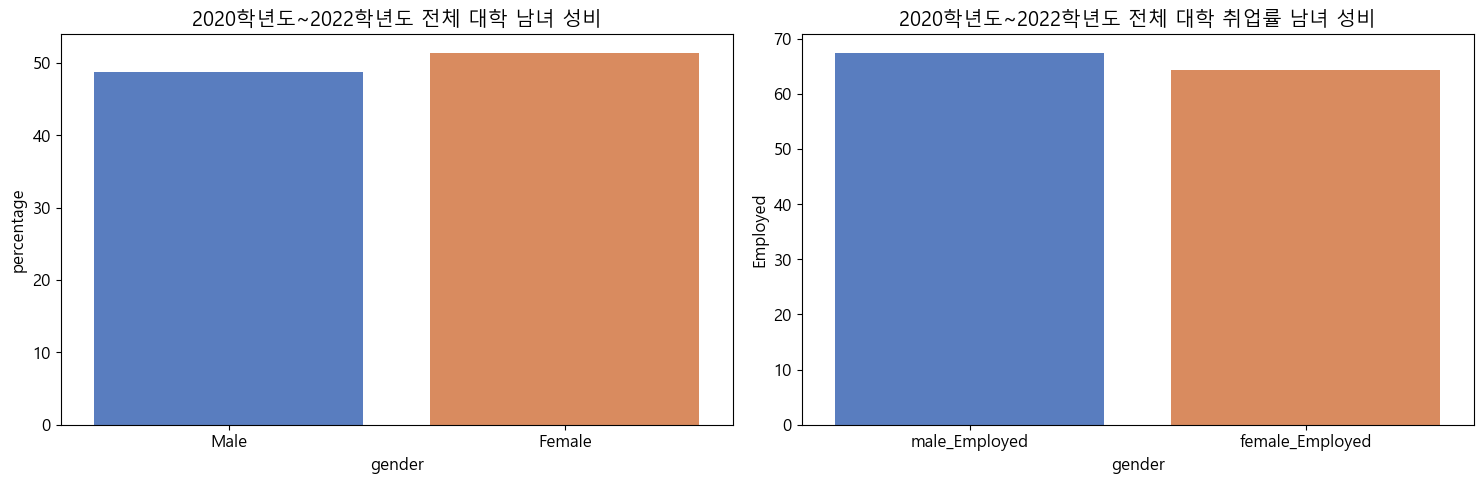

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.rcParams['font.size'] = 12

# 전체 대학 남여 성비 확인
sns.barplot(ax=axes[0], x='gender', y='percentage', data=gender_df, palette='muted')
# axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('2020학년도~2022학년도 전체 대학 남녀 성비')
# 전체 대학 남여 취업률 확인
sns.barplot(ax=axes[1], x='gender', y='Employed', data=gender_Employed_df, palette='muted')
# axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('2020학년도~2022학년도 전체 대학 취업률 남녀 성비')

display(gender_df)
display(gender_Employed_df)

plt.tight_layout()
plt.show()

#### 💡 분석
- 전체 대학의 졸업자 남녀 비율은 여자가 약 51.35%, 남자가 48.65%을 차지했으며, 여자 졸업생이 더 높게 나타남.
- 전체 대학의 남녀 취업률에서 남자가 약 67.42%, 여자가 약 64.26%로 나타났으며, 남자가 약 3.16% 정도 높음.

#### 📌 시사점
- 졸업생 비율은 여성이 더 우세하나 취업률은 남성이 더 우세한 것으로 나타남.

#### 📊 전체 대학 취업률 순위(3년 평균)
※ 취업률이 0%인 대학교는 순위에 포함하지 않음.

In [46]:
# 취업률 계급 책정을 위한 함수 선언
def get_class(x):
    if x <= 19:
        return 10
    if x >= 20 and x < 30:
        return 20
    if x >= 30 and x < 40:
        return 30
    if x >= 40 and x < 50:
        return 40
    if x >= 50 and x < 60:
        return 50
    if x >= 60 and x < 70:
        return 60
    if x >= 70 and x < 80:
        return 70
    if x >= 80 and x < 90:
        return 80
    if x >= 90 and x < 100:
        return 90
    return 1

In [47]:
# 각 대학 별 3년간 평균 취업률 계산
em_all_rank = em_up_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_rank = em_all_rank[~ (em_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_rank = em_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_rank['Employment_class'] = em_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_rank['rank'] = em_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_rank = em_rank.astype({'rank': 'int8'})

# 데이터 프레임 합치기
em_rank = pd.merge(em_rank, un_list_df, on='Name')

display(em_rank)

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,93.866667,90,1,전문대학,사립,경기,기존
1,가톨릭대학교 _제2캠퍼스,90.700000,90,2,대학교,사립,서울,기존
2,한국폴리텍 특성화대학 바이오캠퍼스,89.433333,80,3,기능대학,사립,충남,기존
3,을지대학교,89.400000,80,4,대학교,사립,대전,기존
4,한국폴리텍 VI 대학 영남융합기술캠퍼스,87.966667,80,5,기능대학,사립,대구,기존
...,...,...,...,...,...,...,...,...
366,호남신학대학교,49.333333,40,111,대학교,사립,광주,기존
367,대신대학교,49.100000,40,112,대학교,사립,경북,기존
368,한국폴리텍 V 대학 순천캠퍼스,48.900000,40,113,기능대학,사립,전남,기존
369,웅지세무대학교,46.300000,40,114,전문대학,사립,경기,기존


#### 📊 2020학년도 대학 취업률 순위

In [48]:
# 대학 별 3년간 평균 취업률 계산
em_2020_all_rank = em_2020_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2020_rank = em_2020_all_rank[~ (em_2020_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2020_rank = em_2020_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2020_rank['Employment_class'] = em_2020_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2020_rank['rank'] = em_2020_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2020_rank = em_2020_rank.astype({'rank': 'int8'})

em_2020_rank = pd.merge(em_2020_rank, un_list_df, on='Name')
em_2020_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,94.2,90,1,전문대학,사립,경기,기존
1,한국폴리텍 특성화대학 바이오캠퍼스,91.6,90,2,기능대학,사립,충남,기존
2,가톨릭대학교 _제2캠퍼스,90.5,90,3,대학교,사립,서울,기존
3,한국폴리텍 I 대학 서울강서캠퍼스,86.3,80,4,기능대학,사립,서울,기존
4,춘해보건대학교,85.8,80,5,전문대학,사립,울산,기존
...,...,...,...,...,...,...,...,...
366,백제예술대학교,42.8,40,111,전문대학,사립,전북,기존
367,서울교육대학교,42.4,40,112,교육대학,국립,서울,기존
368,대신대학교,42.1,40,113,대학교,사립,경북,기존
369,영남신학대학교,40.0,40,114,대학교,사립,경북,기존


#### 📊 2021학년도 대학 취업률 순위

In [49]:
# 대학 별 3년간 평균 취업률 계산
em_2021_all_rank = em_2021_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2021_rank = em_2021_all_rank[~ (em_2021_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2021_rank = em_2021_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2021_rank['Employment_class'] = em_2021_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2021_rank['rank'] = em_2021_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2021_rank = em_2021_rank.astype({'rank': 'int8'})

em_2021_rank = pd.merge(em_2021_rank, un_list_df, on='Name')
em_2021_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,95.4,90,1,전문대학,사립,경기,기존
1,한국폴리텍 V 대학 익산캠퍼스,91.1,90,2,기능대학,사립,전북,기존
2,가톨릭대학교 _제2캠퍼스,90.1,90,3,대학교,사립,서울,기존
3,을지대학교,87.3,80,4,대학교,사립,대전,기존
4,한국폴리텍 VI 대학 영남융합기술캠퍼스,87.3,80,4,기능대학,사립,대구,기존
...,...,...,...,...,...,...,...,...
365,대신대학교,48.9,40,110,대학교,사립,경북,기존
366,웅지세무대학교,46.7,40,111,전문대학,사립,경기,기존
367,부산장신대학교,45.2,40,112,대학교,사립,경남,기존
368,부산예술대학교,42.9,40,113,전문대학,사립,부산,기존


#### 📊 2022학년도 대학 취업률 순위

In [50]:
# 대학 별 3년간 평균 취업률 계산
em_2022_all_rank = em_2022_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2022_rank = em_2022_all_rank[~ (em_2022_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2022_rank = em_2022_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2022_rank['Employment_class'] = em_2022_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2022_rank['rank'] = em_2022_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2022_rank = em_2022_rank.astype({'rank': 'int8'})

em_2022_rank = pd.merge(em_2022_rank, un_list_df, on='Name')
em_2022_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,을지대학교,97.9,90,1,대학교,사립,대전,기존
1,한국폴리텍 VI 대학 영남융합기술캠퍼스,92.2,90,2,기능대학,사립,대구,기존
2,농협대학교,92.0,90,3,전문대학,사립,경기,기존
3,가톨릭대학교 _제2캠퍼스,91.5,90,4,대학교,사립,서울,기존
4,한국폴리텍 특성화대학 바이오캠퍼스,89.5,80,5,기능대학,사립,충남,기존
...,...,...,...,...,...,...,...,...
366,금강대학교,52.1,50,111,대학교,사립,충남,기존
367,한국교원대학교,52.1,50,111,대학교,국립,충북,기존
368,웅지세무대학교,46.8,40,113,전문대학,사립,경기,기존
369,호남신학대학교,46.4,40,114,대학교,사립,광주,기존


#### 📊 2020~2022학년도 대학 취업률 히스토그램

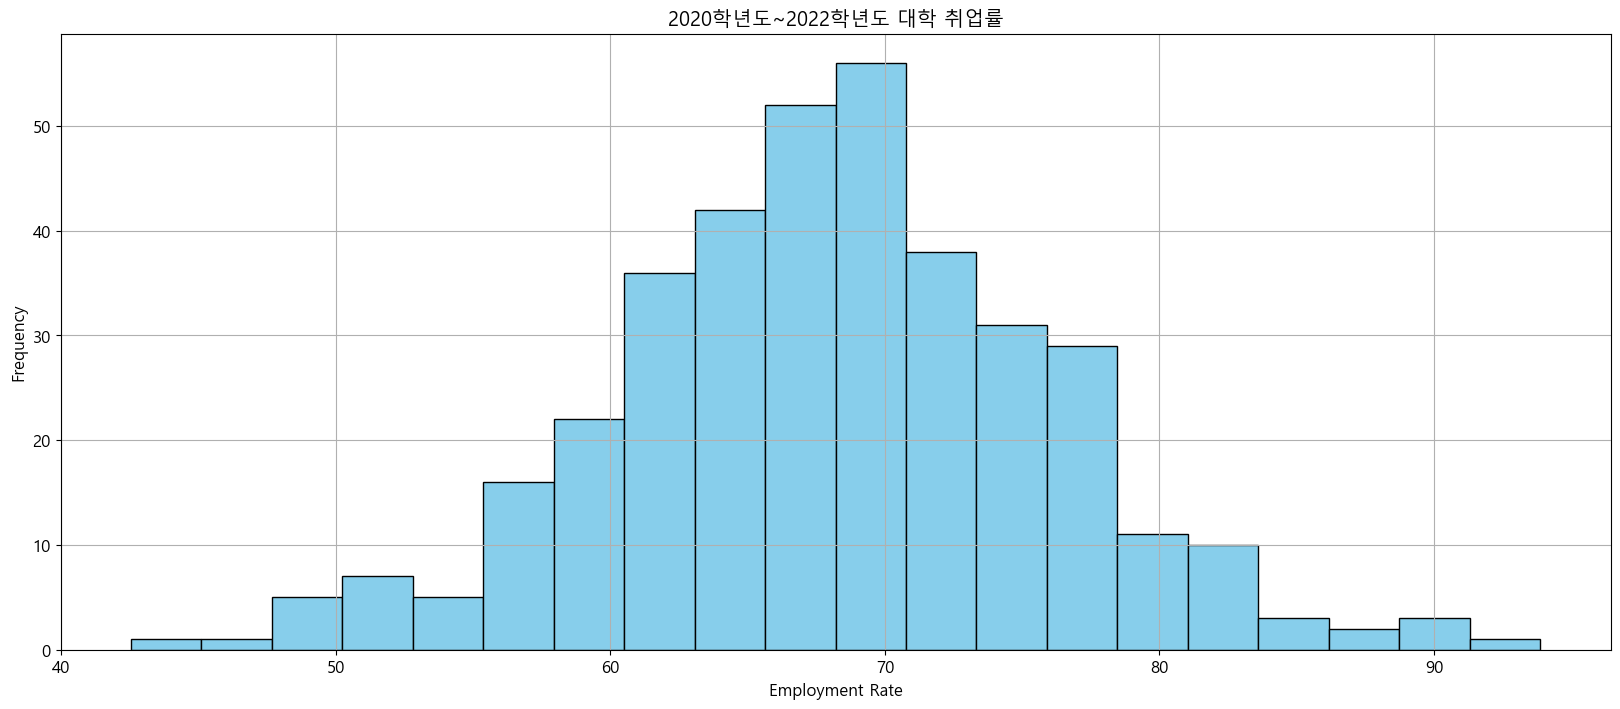

In [51]:
# 취업률 데이터가 담긴 데이터프레임의 "Employment_Rate" 열을 이용하여 히스토그램 그리기
plt.figure(figsize=(20, 8))
# 20개의 구간으로 나누어 히스토그램 그리기
plt.hist(em_rank['Employment_Rate'], bins=20, color='skyblue', edgecolor='black')
# x축 레이블 설정
plt.xlabel('Employment Rate')
# y축 레이블 설정
plt.ylabel('Frequency')
# 그래프 제목 설정
plt.title('2020학년도~2022학년도 대학 취업률')
# 그리드 표시
plt.grid(True)
plt.show()

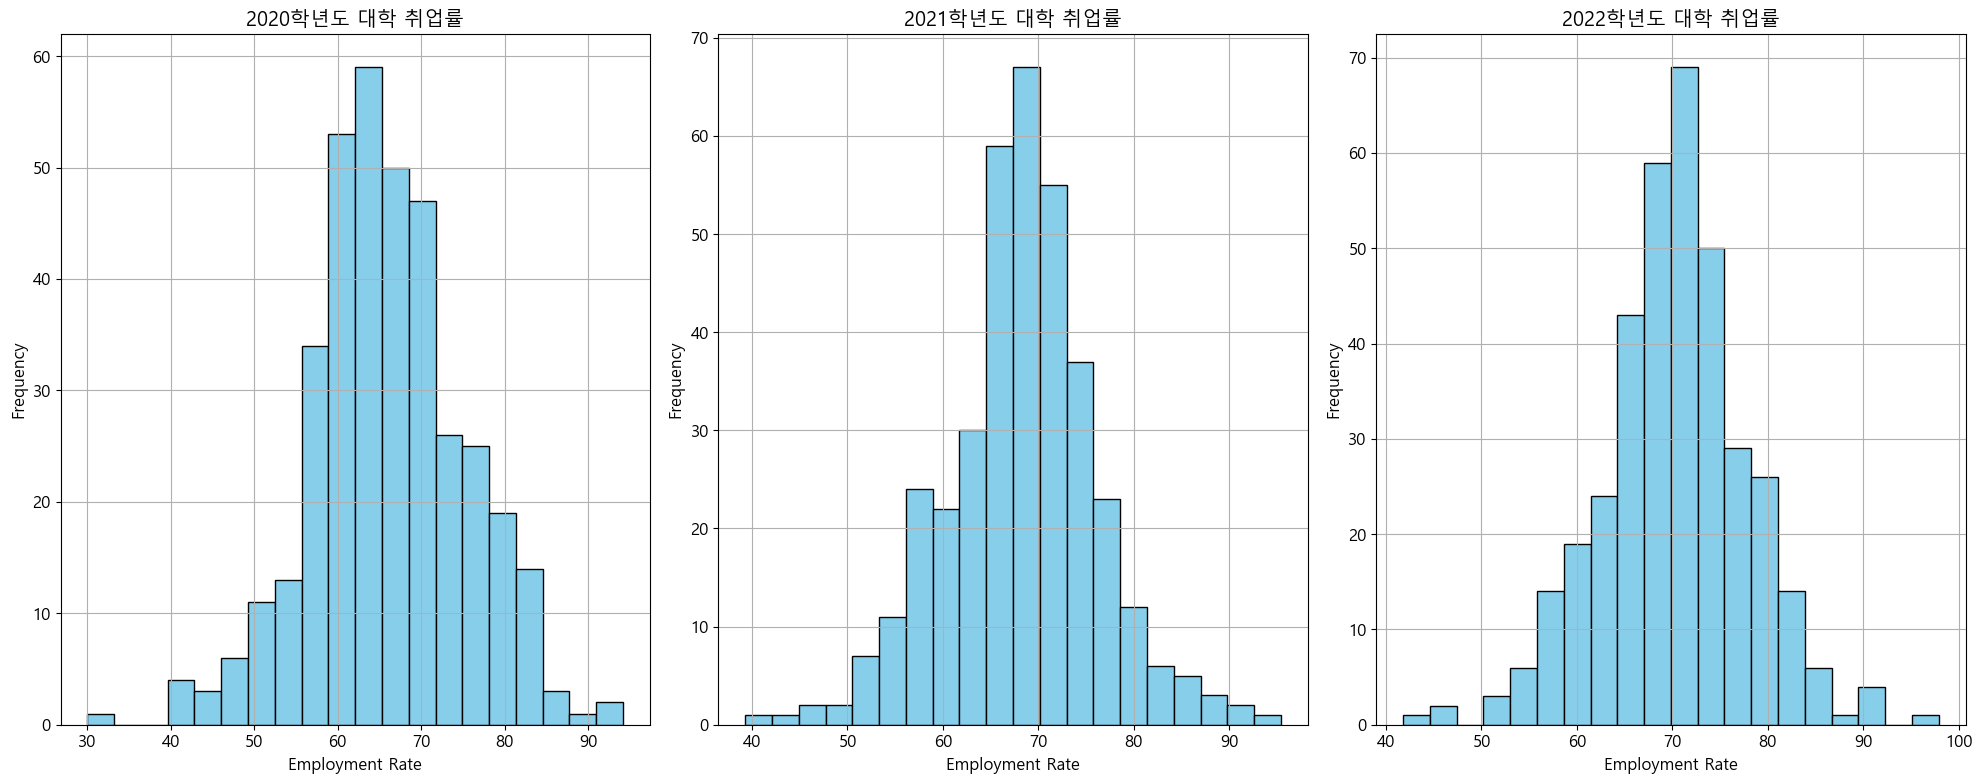

In [52]:
# 히스토그램을 그릴 학년도별 대학 취업률 데이터 프레임과 학년도 리스트
em_rank_dataframes = [em_2020_rank, em_2021_rank, em_2022_rank]
years = ['2020', '2021', '2022']

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 각 서브플롯에 대한 히스토그램 그리기
for i, (dataframe, year) in enumerate(zip(em_rank_dataframes, years)):
    axes[i].hist(dataframe['Employment_Rate'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Employment Rate')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{year}학년도 대학 취업률')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### 💡 분석
- 농협대학교가 취업률 약 93.86%로 가장 높은 취업률을 달성하였으며, 부산예술대학이 약 42.53%로 가장 낮은 취업률을 달성함.
- 약 60~80% 취업률을 달성한 대학의 분포가 높게 나타남.

#### 📌 시사점
- 농협대학교의 경우 단위농협에서 운영하는 대학으로 졸업 후 해당 기업의 취업추천 제도 또는 농협대학 지원 전형이 있어 높은 취업률을 달성함.
- 부산예술대학교의 경우 예술 분야 교과과정의 자율성을 지키고자 대학기본역량에 참여하지 않는 등 일반대학과 같이 취·창업에 중점을 두고 있지 않아 저조한 취업률이 나타났다 판단됨.

#### ❓ 가설
- 취업률이 저조한 대학의 취업률 미집계 데이터 확인이 필요

#### 📊 대학 종류 별 비중 구하기

In [53]:
university_type_all_counts = university_type_counts_df['count'].sum()

In [54]:
university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '대학교']['count'].values[0]
Technology_university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '전문대학']['count'].values[0]
Technical_university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '기능대학']['count'].values[0]
Education_university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '교육대학']['count'].values[0]
Various_university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '각종학교(대학)']['count'].values[0]
Industrial_university_count = university_type_counts_df[university_type_counts_df['University_Type'] == '산업대학']['count'].values[0]

university_count_pmf = university_count / university_type_all_counts
university_pmf = pd.DataFrame({'대학교': [university_count_pmf]})
university_pmf['전문대학'] = Technology_university_count / university_type_all_counts
university_pmf['기능대학'] = Technical_university_count / university_type_all_counts
university_pmf['교육대학'] = Education_university_count / university_type_all_counts
university_pmf['각종학교(대학)'] = Various_university_count / university_type_all_counts
university_pmf['산업대학'] = Industrial_university_count / university_type_all_counts
university_pmf

# 데이터 프레임 행과 열 변경 후 새로운 인덱스 값 넣기
university_pmf = university_pmf.T.reset_index()

# 피처명 변경
university_pmf = university_pmf.rename(columns={'index': 'university_type', 0: 'pmf'})
university_pmf

,university_type,pmf
0,대학교,0.547120
1,전문대학,0.342932
2,기능대학,0.073298
3,교육대학,0.026178
4,각종학교(대학),0.005236
5,산업대학,0.005236


#### 📊 대학 종류 별 취업률 비중 

In [55]:
# 대학 종류별로 취업률의 합계를 계산합니다.
employment_rate_sum = em_rank.groupby('University_Type')['Employment_Rate'].sum()

# 전체 취업률의 합계를 계산합니다.
total_employment_rate = em_rank['Employment_Rate'].sum()

# 각 대학 종류별로 취업률의 비중을 계산합니다.
employment_rate_weight = employment_rate_sum / total_employment_rate

# 비중 백분율로 변환
employment_rate_weight = pd.DataFrame(employment_rate_weight).reset_index()
perentile = pd.DataFrame(round((employment_rate_sum / total_employment_rate) * 100, 2)).reset_index()

# 데이터 프레임 합치기
employment_rate_weight = pd.merge(employment_rate_weight, perentile, on='University_Type')
# 데이터 프레임 피처명 변경
employment_rate_weight = employment_rate_weight.rename(columns={'Employment_Rate_x': 'Employment_Rate', 'Employment_Rate_y': 'perentile'})
display(employment_rate_weight)

,University_Type,Employment_Rate,perentile
0,각종학교(대학),0.004900,0.49
1,교육대학,0.024414,2.44
2,기능대학,0.086455,8.65
3,대학교,0.509068,50.91
4,산업대학,0.005718,0.57
5,전문대학,0.369445,36.94


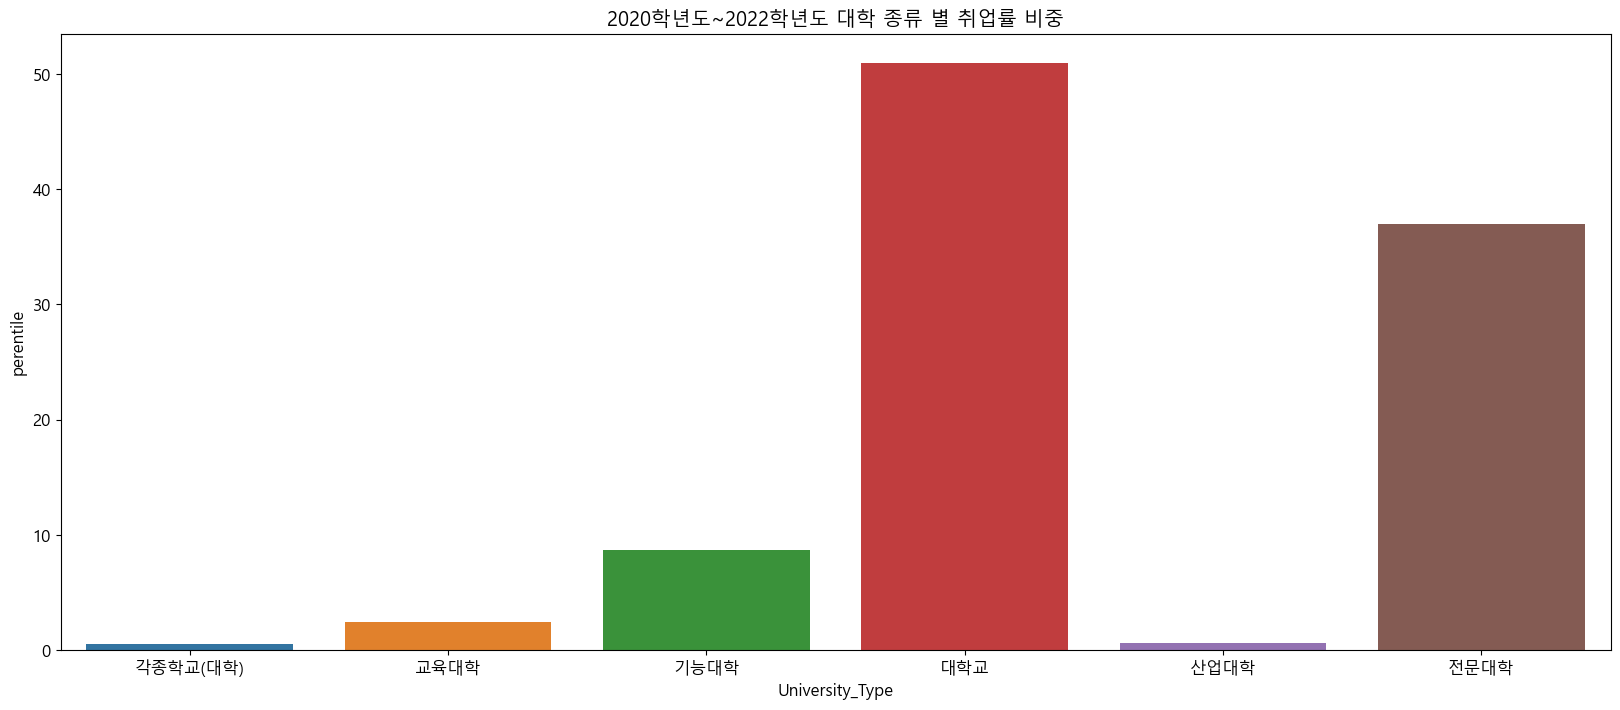

In [56]:
plt.figure(figsize=(20, 8))

# 대학 종류 별 취업률 비중
sns.barplot(x='University_Type', y='perentile', data=employment_rate_weight)
plt.title('2020학년도~2022학년도 대학 종류 별 취업률 비중')
plt.show()

#### 📊 취업률이 0%인 대학교(3년 평균)

In [57]:
em_zero_rank = em_all_rank[em_all_rank['Employment_Rate'] == 0.0]
em_zero_rank = pd.merge(em_zero_rank, un_list_df, on='Name')
em_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2020학년도 취업률이 0%인 대학교

In [58]:
em_2020_zero_rank = em_2020_all_rank[em_2020_all_rank['Employment_Rate'] == 0.0]
em_2020_zero_rank = pd.merge(em_2020_zero_rank, un_list_df, on='Name')
em_2020_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2021학년도 취업률이 0%인 대학교

In [59]:
em_2021_zero_rank = em_2021_all_rank[em_2021_all_rank['Employment_Rate'] == 0.0]
em_2021_zero_rank = pd.merge(em_2021_zero_rank, un_list_df, on='Name')
em_2021_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2022학년도 취업률이 0%인 대학교

In [60]:
em_2022_zero_rank = em_2022_all_rank[em_2022_all_rank['Employment_Rate'] == 0.0]
em_2022_zero_rank = pd.merge(em_2022_zero_rank, un_list_df, on='Name')
em_2022_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


In [61]:
import folium
import requests

In [62]:
# 서울을 중심으로 지도 생성
map_center = [36, 127.0]

# 대학 위치 데이터 불러오기
university_data = pd.read_csv('./datasets/zero_region.csv')
display(university_data)

# Folium 지도 객체 생성
map_obj = folium.Map(location=map_center, zoom_start=7)

# 대학 위치 정보를 지도에 마커로 표시
for index, row in university_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=row['Name']).add_to(map_obj)

# 생성한 지도를 HTML 파일로 저장하거나 직접 출력
map_obj.save("university_map.html")

map_obj

,Establishment_Type,Region,Status,Name,Latitude,Longitude
0,사립,서울,기존,가톨릭대학교 _제3캠퍼스,37.584813,127.004844
1,사립,서울,기존,감리교신학대학교,37.567297,126.962276
2,사립,전남,기존,광주가톨릭대학교,35.150643,126.868699
3,사립,세종,기존,대전가톨릭대학교,36.655218,127.197973
4,사립,대전,기존,대전신학대학교,36.350110,127.423535
5,사립,경기,기존,수원가톨릭대학교,37.195905,126.932953
6,사립,경기,기존,아신대학교,37.510446,127.427046
7,사립,전남,기존,영산선학대학교,35.327318,126.441406
8,사립,인천,기존,인천가톨릭대학교,37.657475,126.448979
9,사립,서울,기존,장로회신학대학교,37.550150,127.103877


In [63]:
# # 서울을 중심으로 지도 생성
# map_center = [36, 127.0]

# # 대학 위치 데이터 불러오기
# university_data = pd.read_csv('./datasets/zero_region.csv')
# display(university_data)

# # Folium 지도 객체 생성
# map_obj = folium.Map(location=map_center, zoom_start=7)

# # 히트맵 생성
# folium.Choropleth(
#     geo_data='./datasets/SIDO_MAP_2022.json',
#     name='choropleth',
#     data=university_data,
#     columns=['Latitude', 'Longitude'],
#     key_on='feature.id',
#     fill_color='RdPu',
#     fill_opacity=0.7,
#     line_opacity=0.7,
#     legend_name='tt'
# ).add_to(map_obj)

# # 히트맵을 지도에 추가
# folium.LayerControl().add_to(map_obj)

# # 지도를 HTML 파일로 저장
# map_obj.save('university_map.html')

# # 지도를 출력
# map_obj

#### 💡 분석
- 취업률이 0%인 대학의 경우 대부분이 미션 스쿨임.
  

#### ❓ 가설
진학 또는 4대 보험 미적용에 따른 미집계 데이터로 들어간 게 아닐까?

#### 📊 취업률이 0%인 대학의 취업률 미집계 현황

In [64]:
# 전체 대학 3년 치 취업률 미집계 인원 집계 후 새로운 데이터 프레임 생성
Uncounted_df = Employed_all.groupby('Name')['Uncounted_total'].sum().reset_index()
# 졸업생 인원 비교를 위해 데이터 프레임에 졸업생 카운트 피처 추가
Uncounted_df['Graduates_total'] = Employed_all.groupby('Name')['Graduates_total'].sum().reset_index()['Graduates_total']

# 취업률 미집계 데이터 정리
uncounted_total = uncounted_all.groupby('Name').sum('Scholar_total').reset_index()
# year테이블 삭제
uncounted_total = uncounted_total.drop(labels='Year', axis=1)

# 데이터 프레임 병합
Uncounted_df = pd.merge(Uncounted_df, uncounted_total, on='Name')

# 취업률 0인 대학의 데이터만 남기기
Uncounted_df = Uncounted_df[~ Uncounted_df['Name'].isin(em_rank['Name'])].reset_index(drop=True)

Uncounted_df

,Name,Uncounted_total,Graduates_total,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,가톨릭대학교 _제3캠퍼스,93,93,56,0,0,5,32
1,감리교신학대학교,583,583,138,20,0,2,423
2,광주가톨릭대학교,44,44,25,0,0,1,18
3,대전가톨릭대학교,34,34,25,0,0,0,9
4,대전신학대학교,78,78,29,4,0,0,45
5,수원가톨릭대학교,93,93,62,0,0,4,27
6,아신대학교,481,481,68,14,0,9,390
7,영산선학대학교,23,23,21,0,0,1,1
8,인천가톨릭대학교,41,41,28,0,0,2,11
9,장로회신학대학교,492,492,145,21,0,5,321


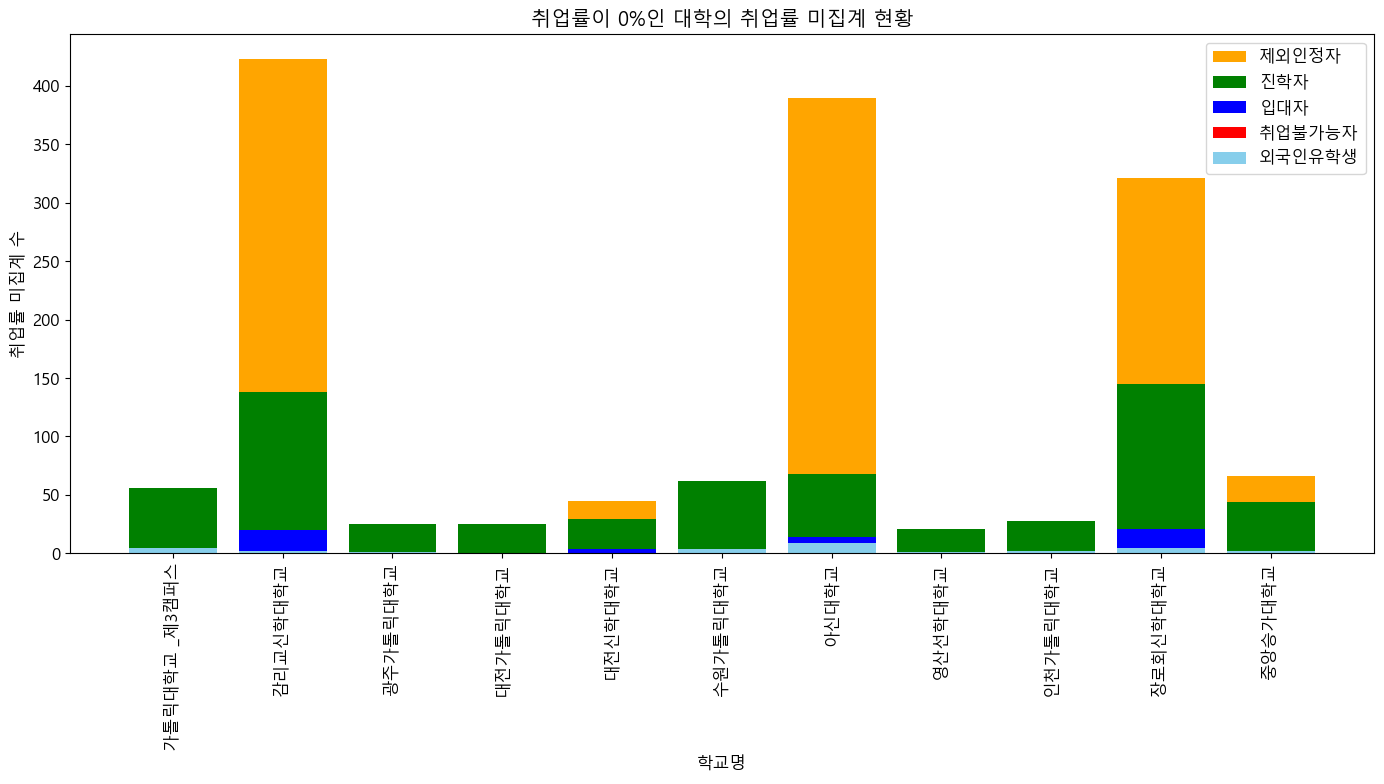

In [84]:
# 데이터 프레임에서 학교명과 각 항목의 값을 추출합니다.
schools = Uncounted_df['Name']
scholar_total = Uncounted_df['Scholar_total']
military_total = Uncounted_df['Military_total']
unemployed_total = Uncounted_df['Unemployed_total']
foreign_total = Uncounted_df['Foreign_total']
excluded_total = Uncounted_df['Excluded_total']

# 그래프를 그리기 위한 설정
plt.figure(figsize=(14, 8))
plt.bar(schools, excluded_total, color='orange', label='제외인정자')
plt.bar(schools, scholar_total, color='green', label='진학자')
plt.bar(schools, military_total, color='blue', label='입대자')
plt.bar(schools, unemployed_total, color='red', label='취업불가능자')
plt.bar(schools, foreign_total, color='skyblue', label='외국인유학생')



# 그래프에 대한 라벨과 범례 추가
plt.xlabel('학교명')
plt.ylabel('취업률 미집계 수')
plt.title('취업률이 0%인 대학의 취업률 미집계 현황')
plt.xticks(rotation=90)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

#### 💡 분석
3개년 졸업자 전원 취업률 미집계 데이터로 들어감

#### 📊 2022학년도 한국폴리텍 V 대학 순천캠퍼스 취업률 미집계 현황

In [66]:
# 전체 대학 2022학년도 데이터만 추출하여 새로운 데이터 프레임 생성
Uncounted_2021_df = Employed_all[Employed_all['Year'] == 2021].reset_index(drop=True)
# 필요한 피처만 가져오기
Uncounted_2021_df = Uncounted_2021_df[['Name', 'Graduates_total', 'Uncounted_total', 'Others_total']]
# 한국폴리텍 V 대학 순천캠퍼스의 정보만 가져오기
Uncounted_2021_df =Uncounted_2021_df[Uncounted_2021_df['Name'] == '한국폴리텍 V 대학 순천캠퍼스']
Uncounted_2021_df

,Name,Graduates_total,Uncounted_total,Others_total
363,한국폴리텍 V 대학 순천캠퍼스,11,9,2


In [67]:
# 취업률 미집계 데이터 정리
uncounted_all_2021 = uncounted_all[uncounted_all['Year'] == 2021]
uncounted_all_2021 = uncounted_all_2021[uncounted_all_2021['Name'] == '한국폴리텍 V 대학 순천캠퍼스']

# year테이블 삭제
uncounted_all_2021_total = uncounted_all_2021.drop(labels='Year', axis=1)
uncounted_all_2021_total

,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
745,한국폴리텍 V 대학 순천캠퍼스,0,9,0,0,0


#### 💡 분석
취업률 미집계